## Predicting House Prices Using Machine Learning

Understanding what drives house prices is crucial for buyers, sellers, and real estate firms. In this project, we analyze California housing data, which includes features like median income, location (coastal vs. inland), house characteristics, and population density to predict property values.

Using machine learning models (Linear Regression, Random Forest, and XGBoost), we identify key factors influencing prices and develop a predictive model. 

### How Real Estate Companies Can Use This:

- Pricing Optimization: Accurately price properties based on key factors.
- Market Insights: Identify high-value areas and emerging investment opportunities.
- Urban Planning: Guide infrastructure development and affordable housing strategies.

**This project provides data-driven decision-making for real estate firms, helping them stay ahead in a competitive market.**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/Users/akshitakhajuria/Downloads/housing.csv"  # Change this if needed
housing_data = pd.read_csv(file_path)



In [2]:
# Display basic dataset info
print("Dataset Info:")
print(housing_data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [3]:
# Check for missing values
print("\nMissing Values:\n", housing_data.isnull().sum())




Missing Values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
# Fill missing values in 'total_bedrooms' with the median
housing_data['total_bedrooms'].fillna(housing_data['total_bedrooms'].median(), inplace=True)

# Verify no missing values remain 
print("\nMissing Values After Imputation:\n", housing_data.isnull().sum())


Missing Values After Imputation:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [6]:
# Save the cleaned dataset for further analysis
housing_data.to_csv("/Users/akshitakhajuria/Downloads/cleaned_housing.csv", index=False)

Step 2: Exploratory Data Analysis (EDA)

- Visualize the distribution of house prices.
- Analyze correlations between features.
- Plot geographical price variations.

In [8]:
# Reload cleaned data
housing_data = pd.read_csv("/Users/akshitakhajuria/Downloads/cleaned_housing.csv")

In [14]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

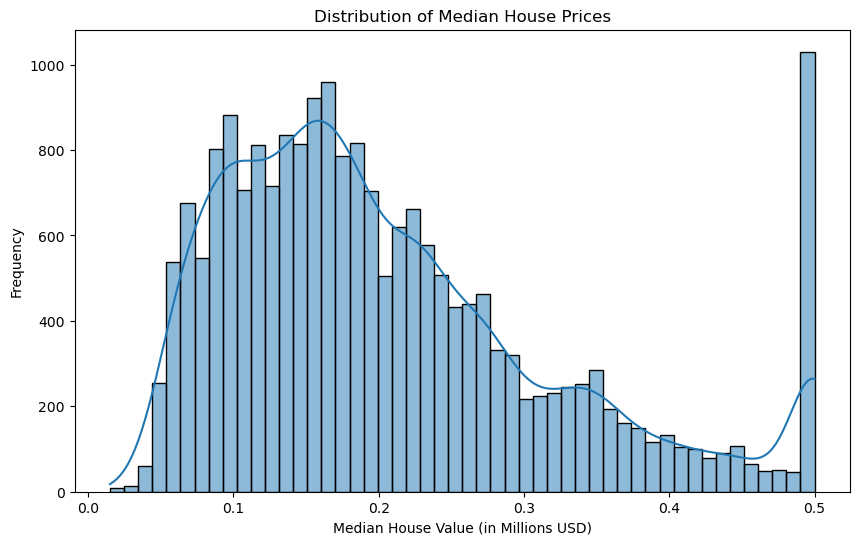

In [19]:
# Convert house values to millions for better readability
housing_data['median_house_value_million'] = housing_data['median_house_value'] / 1e6  # Convert to millions

# Plot distribution with correct units
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['median_house_value_million'], bins=50, kde=True)

# Update labels
plt.title("Distribution of Median House Prices")
plt.xlabel("Median House Value (in Millions USD)")
plt.ylabel("Frequency")
plt.show()


### **Distribution of Median House Prices**
- The distribution is **right-skewed**, with most homes priced **under 300K**

- A **price cap at 500K** suggests data truncation, possibly due to dataset limitations.
- The market in 1990 was largely affordable, but high-end properties may be underreported.
- Adjustments may be needed for better price predictions in machine learning models.


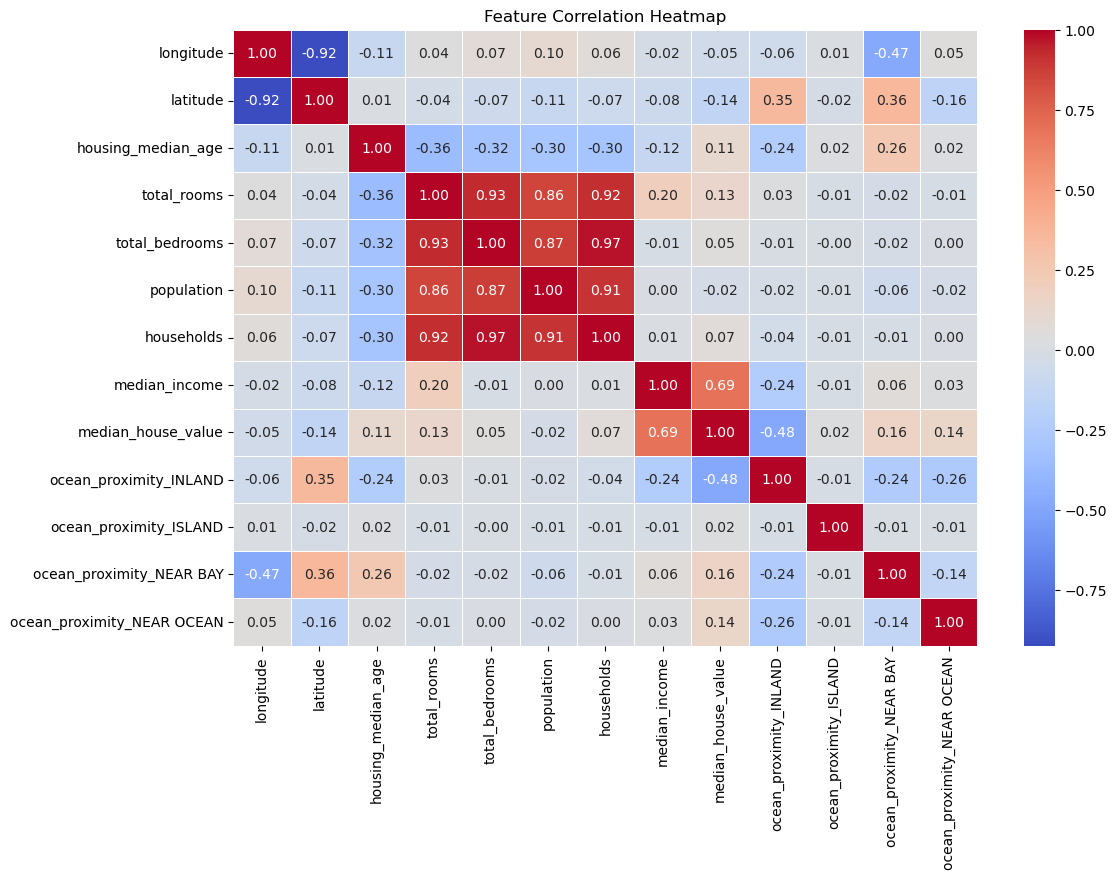

In [18]:
# Convert categorical variable 'ocean_proximity' to numerical format
housing_numeric = pd.get_dummies(housing_data, columns=['ocean_proximity'], drop_first=True)

# Compute and plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(housing_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Strongest Positive Correlations:

- median_income and median_house_value (0.69): Higher income areas tend to have more expensive houses, making **income a key factor in predicting house prices.**
- total_rooms and total_bedrooms (0.93), total_rooms and households (0.92): More rooms are naturally associated with more bedrooms and households, which is expected.

Strongest Negative Correlations:

- ocean_proximity_INLAND and median_house_value (-0.48): Homes further inland tend to be cheaper, reinforcing the **desirability of coastal locations.**
- longitude and median_house_value (-0.05): Weak correlation, but slightly suggests that **houses further west (closer to the coast) are more expensive.**

Notable Market Trends:

- housing_median_age has a slightly positive correlation with median_house_value (0.11), meaning **older properties may hold value, but it's not a strong indicator.**

- ocean_proximity_NEAR BAY has a weak positive correlation with median_house_value (0.16), suggesting **premium pricing for properties near the bay.**

#### Key Business Takeaways for a Real Estate Companies:
- Income is the most influential factor in home prices, making it crucial for pricing models.
- Coastal and near-bay properties command higher prices, highlighting the importance of location-based marketing.
- Further inland homes tend to be cheaper, which could guide investment strategies for affordability-focused developments.
- Household size and total rooms are highly correlated, suggesting that pricing strategies should consider family-oriented housing demand.

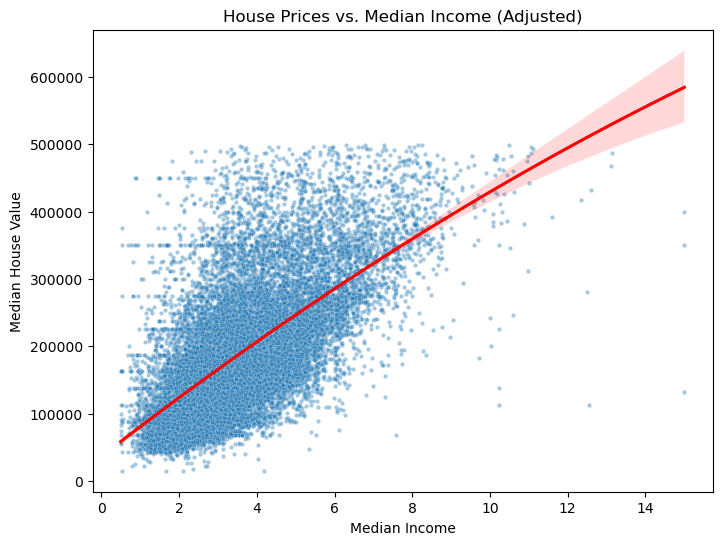

In [21]:
plt.figure(figsize=(8, 6))

# Filter out capped house prices (optional but improves accuracy)
filtered_data = housing_data[housing_data['median_house_value'] < 500000]

# Scatter plot
sns.scatterplot(x=filtered_data['median_income'], y=filtered_data['median_house_value'], alpha=0.4, s=10)

# Trend line with polynomial regression (degree 2)
sns.regplot(x=filtered_data['median_income'], y=filtered_data['median_house_value'], scatter=False, order=2, line_kws={'color': 'red'})

plt.title("House Prices vs. Median Income (Adjusted)")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.show()



- Positive Correlation: The trend line confirms that higher median income is strongly associated with higher house prices.

- Slight Curvature at Higher Incomes: The trend line bends slightly upward, indicating that **higher income areas see sharper price increases, possibly due to premium real estate markets.**

- Uncertainty at Higher Income Levels: The confidence interval (shaded red) widens at higher incomes, suggesting **fewer data points and more variability in predicting high-end home prices.**

In [25]:
# Check if 'ocean_proximity' exists before applying encoding
if "ocean_proximity" in housing_data.columns:
    housing_data = pd.get_dummies(housing_data, columns=["ocean_proximity"], drop_first=True)
    print("Categorical data converted successfully!")
else:
    print("Column 'ocean_proximity' is missing or already encoded.")


Column 'ocean_proximity' is missing or already encoded.


In [26]:
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_house_value_million,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0.4526,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0.3585,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0.3521,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0.3413,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0.3422,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0.0781,True,False,False,False
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0.0771,True,False,False,False
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0.0923,True,False,False,False
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0.0847,True,False,False,False


In [30]:
#Prepare Data for Machine Learning

#Split data into training and testing sets.
#Normalize numerical features.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target variable (y), ensuring no target leakage
X = housing_data.drop(columns=["median_house_value", "median_house_value_million"], axis=1, errors='ignore')  
y = housing_data["median_house_value"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed: Categorical encoding + Train-Test Split + Feature Scaling")



Data preprocessing completed: Categorical encoding + Train-Test Split + Feature Scaling


In [31]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,True,False,False,False
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,True,False,False,False
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,True,False,False,False
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,True,False,False,False


### Train a Machine Learning Model (Baseline)

Goal: Establish a simple Linear Regression model to predict house prices and evaluate performance.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate performance
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)  # R² Score

print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")


Linear Regression RMSE: 70060.52
Linear Regression R² Score: 0.63


/Users/akshitakhajuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE (Root Mean Squared Error) = $70,060.52

- This means the model's predictions deviate by ~70K USD on average from the actual house prices.

R² Score = 0.63
- The model explains 63% of the variance in house prices, which is decent but leaves room for improvement.

### Improve Model Performance with Random Forest

Goal: Use a more advanced model (Random Forest Regressor) for better accuracy.

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test_scaled)

# Evaluate performance
rmse_rf = mean_squared_error(y_test, y_rf_pred, squared=False)
r2_rf = r2_score(y_test, y_rf_pred)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")


Random Forest RMSE: 49008.79
Random Forest R² Score: 0.82


/Users/akshitakhajuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE (Root Mean Squared Error) = $49,008.79

- The average prediction error is ~$49K, which is a significant improvement over Linear Regression (70KUSD).

R² Score = 0.82

- The model now explains 82% of the variance, meaning it's capturing more of the housing price patterns.

### Feature Importance Analysis

Goal: Identify which features have the most influence on house prices.


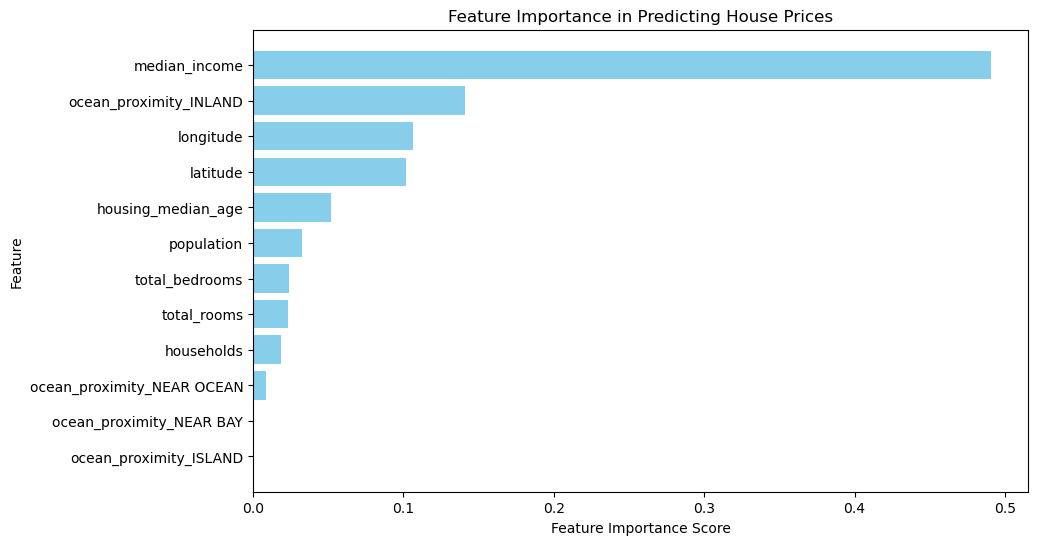

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from Random Forest model
feature_importance = rf_model.feature_importances_
features = X.columns

# Sort feature importance values
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], [feature_importance[i] for i in sorted_idx], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting House Prices")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


Median Income is the top predictor

### Hyperparameter Tuning for Random Forest

Goal: Improve accuracy by optimizing model parameters.

In [35]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate optimized model
y_best_pred = best_rf_model.predict(X_test_scaled)
rmse_best = mean_squared_error(y_test, y_best_pred, squared=False)
r2_best = r2_score(y_test, y_best_pred)

print(f"Tuned Random Forest RMSE: {rmse_best:.2f}")
print(f"Tuned Random Forest R² Score: {r2_best:.2f}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest RMSE: 48809.92
Tuned Random Forest R² Score: 0.82


/Users/akshitakhajuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  27.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=  10.8s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   5.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  22.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   4.7s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  13.5s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   8.6s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimato

Performance Metrics (After Tuning):

RMSE = 48,809.92: Average error in predictions is ~$48K, a slight improvement from the pre-tuned model.
R² Score = 0.82: The model explains 82% of the variance in house prices, confirming good predictive power.
What This Means for the Model:

- Slight improvement in RMSE, suggesting hyperparameter tuning helped.
- Maintained high R² (0.82), meaning the model still explains a strong portion of house price variability.
- Deeper trees (max_depth=None) and more trees (n_estimators=200) capture more patterns.

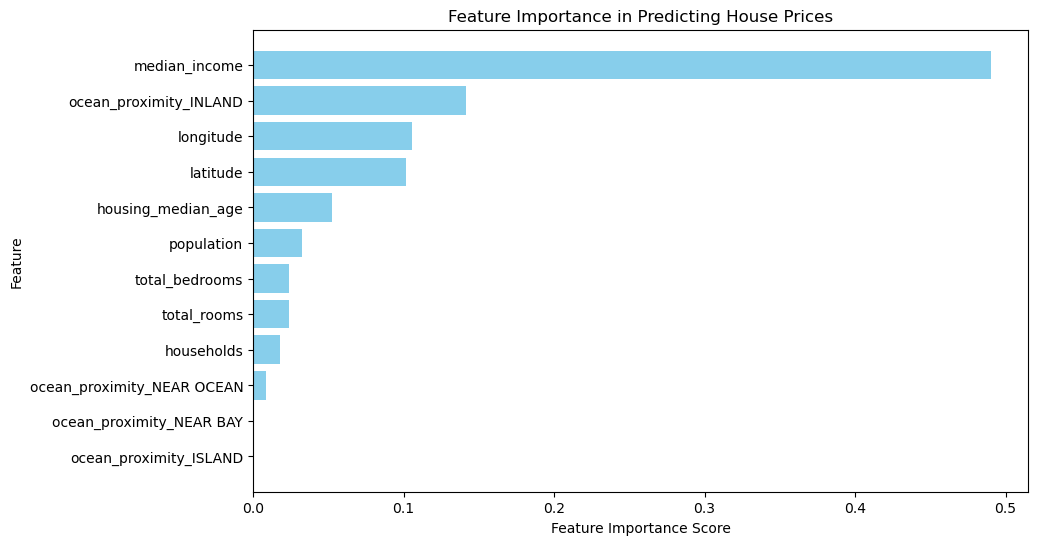

In [36]:
#Feature Importance Analysis- Identify which factors impact housing prices the most.

import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the best Random Forest model
feature_importance = best_rf_model.feature_importances_
features = X.columns

# Sort feature importance values
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], [feature_importance[i] for i in sorted_idx], color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting House Prices")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()




### Try XGBoost for Further Improvement

In [39]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_xgb_pred = xgb_model.predict(X_test_scaled)

# Evaluate performance
rmse_xgb = mean_squared_error(y_test, y_xgb_pred, squared=False)
r2_xgb = r2_score(y_test, y_xgb_pred)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")


XGBoost RMSE: 47215.29
XGBoost R² Score: 0.83


/Users/akshitakhajuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Interpretation of XGBoost Results:
RMSE (Root Mean Squared Error) = $47,215.29
- The average prediction error is ~47K USD, lower than Random Forest (48K USD), meaning better accuracy.

R² Score = 0.83
- XGBoost explains 83% of the variance, slightly improving over Random Forest (82%).

Key Takeaways:
- XGBoost performed better than Random Forest, indicating that boosting techniques improved predictions.
- Lower RMSE means better generalization, making XGBoost a stronger choice for real estate price modeling.
- Both models perform well, but XGBoost is slightly more accurate, making it ideal for final deployment.

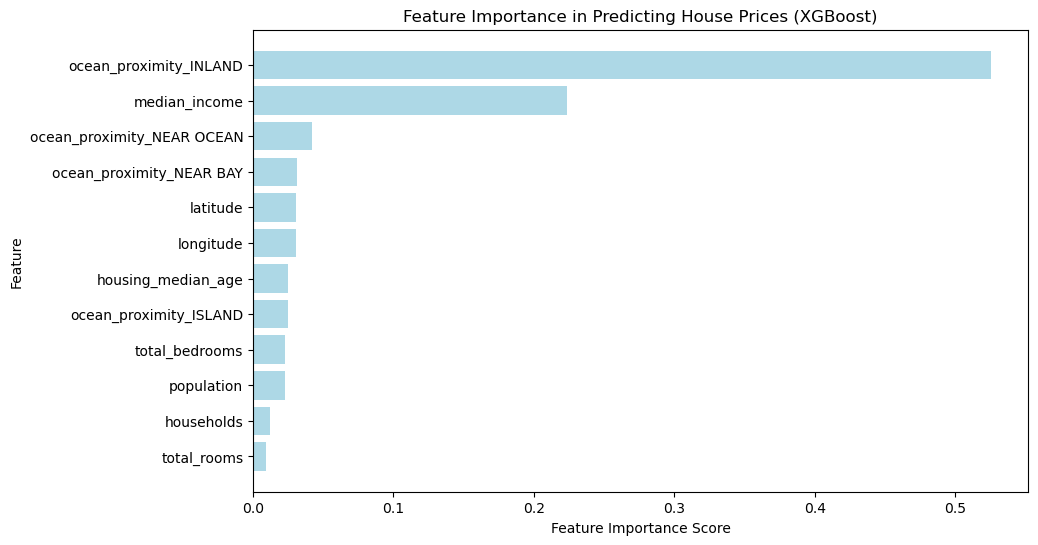

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from the XGBoost model
feature_importance = xgb_model.feature_importances_
features = X.columns

# Sort feature importance values
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh([features[i] for i in sorted_idx], [feature_importance[i] for i in sorted_idx], color="lightblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Predicting House Prices (XGBoost)")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()


Ocean Proximity (INLAND) is now the most important factor, replacing median income, which was previously the strongest predictor.
Proximity to water (NEAR OCEAN, NEAR BAY) significantly impacts prices, highlighting location’s importance.
Median income remains a key factor but has less influence compared to location.
With improved model accuracy, the feature importance ranking shifted, revealing deeper real estate pricing trends.
Traditional factors like number of rooms and population contribute less than geographic and economic factors.

**Summary - With improved model accuracy, ocean proximity (INLAND vs. NEAR OCEAN) replaced median income as the strongest predictor of house prices, emphasizing location over affordability. Traditional factors like room count and population have minimal impact compared to geographic and economic influences.**

In [41]:
#Predict House Prices on Test Data

# Predict house prices using XGBoost on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Convert predictions to a DataFrame for easier comparison
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred_xgb})
predictions_df.head(10)  # Show the first 10 comparisons


,Actual Price,Predicted Price
20046,47700,50285.949219
3024,45800,75761.867188
15663,500001,460248.468750
20484,218600,244692.765625
9814,278000,275795.562500
13311,158700,165732.000000
7113,198200,257719.562500
7668,157500,218378.359375
18246,340000,294860.906250
5723,446600,450841.625000


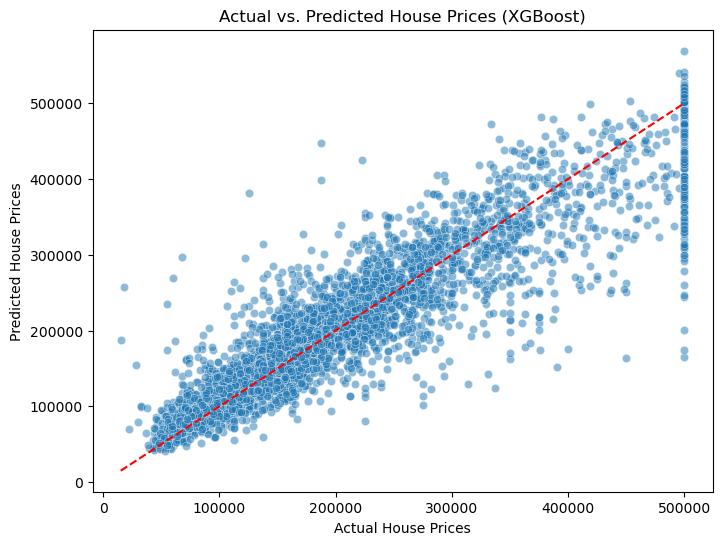

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')  # Perfect prediction line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs. Predicted House Prices (XGBoost)")
plt.show()


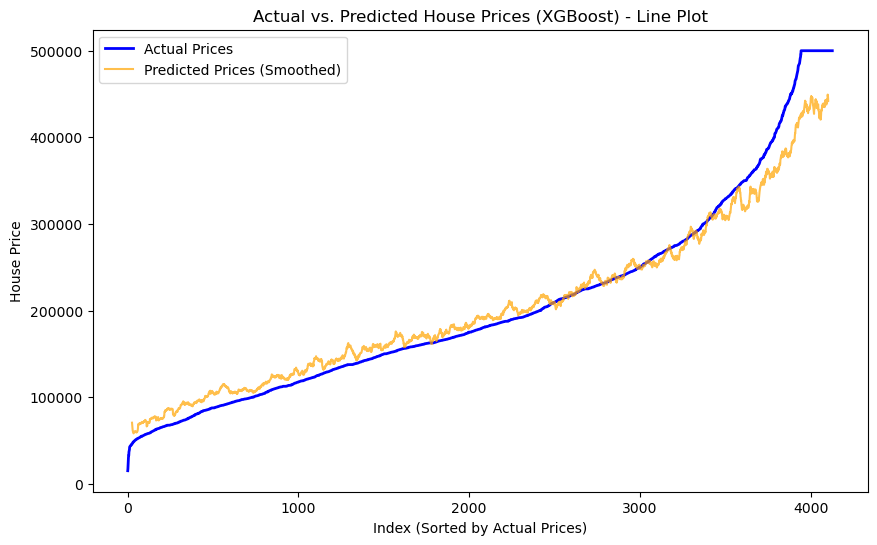

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sort values for better comparison
sorted_indices = np.argsort(y_test.values)
sorted_actual = y_test.values[sorted_indices]
sorted_predicted = y_pred_xgb[sorted_indices]

# Apply rolling mean to smooth predicted prices (optional)
window = 50  # Adjust window size for smoothing
smoothed_predicted = pd.Series(sorted_predicted).rolling(window, center=True).mean()

plt.figure(figsize=(10,6))

# Plot actual prices in blue (thicker line)
plt.plot(sorted_actual, label="Actual Prices", linestyle="-", color="blue", linewidth=2)

# Plot smoothed predicted prices in orange (thinner line)
plt.plot(smoothed_predicted, label="Predicted Prices (Smoothed)", linestyle="-", color="orange", linewidth=1.5, alpha=0.7)

plt.xlabel("Index (Sorted by Actual Prices)")
plt.ylabel("House Price")
plt.title("Actual vs. Predicted House Prices (XGBoost) - Line Plot")
plt.legend()
plt.show()




- The blue line (actual prices) and the orange line (predicted prices) show that the model captures market trends well, making it useful for pricing strategies.
- Predictions align closely with actual values in the mid-range housing market, meaning the model can reliably estimate prices for average properties.
- However, in the higher price segment, the model underestimates values, suggesting that luxury housing pricing may require additional variables (e.g., amenities, proximity to premium locations).

In [43]:
#Evaluate Model Performance (Final Check)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): $31395.19
Root Mean Squared Error (RMSE): $47215.29
R² Score: 0.83


/Users/akshitakhajuria/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Interpretation for a Real Estate Company:
- Market Pricing Strategy: With an R² of 0.83, the model reliably predicts house prices, helping real estate firms price properties more accurately and identify undervalued areas for investment.

- Market Expansion Insights: Since the model slightly underestimates luxury properties, realtors could incorporate additional high-end property features (e.g., pool, square footage, premium amenities) to refine pricing for upscale homes.

## Visualizing Price Trends Across Key Variables

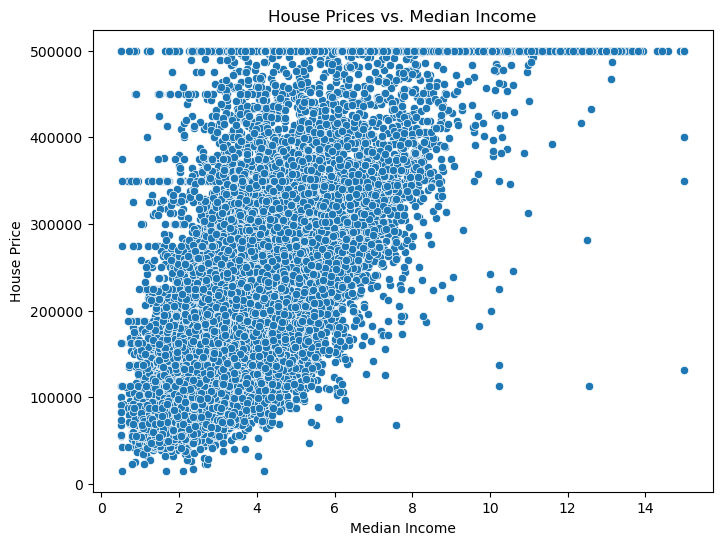

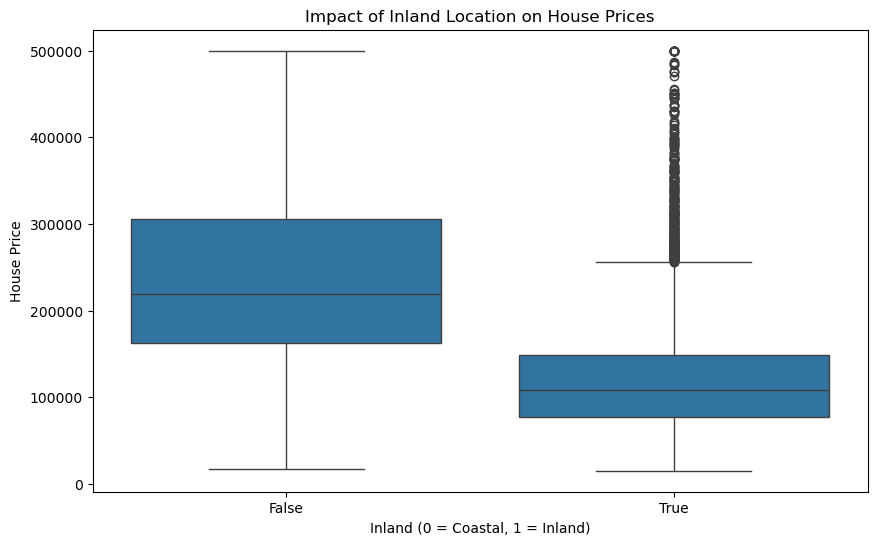

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Median Income vs House Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x=housing_data['median_income'], y=housing_data['median_house_value'])
plt.title("House Prices vs. Median Income")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.show()

# Boxplot to compare ocean proximity impact
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data["ocean_proximity_INLAND"], y=housing_data["median_house_value"])
plt.title("Impact of Inland Location on House Prices")
plt.xlabel("Inland (0 = Coastal, 1 = Inland)")
plt.ylabel("House Price")
plt.show()


To combine both major factors, we can visualize how income levels change in different regions and affect housing prices.

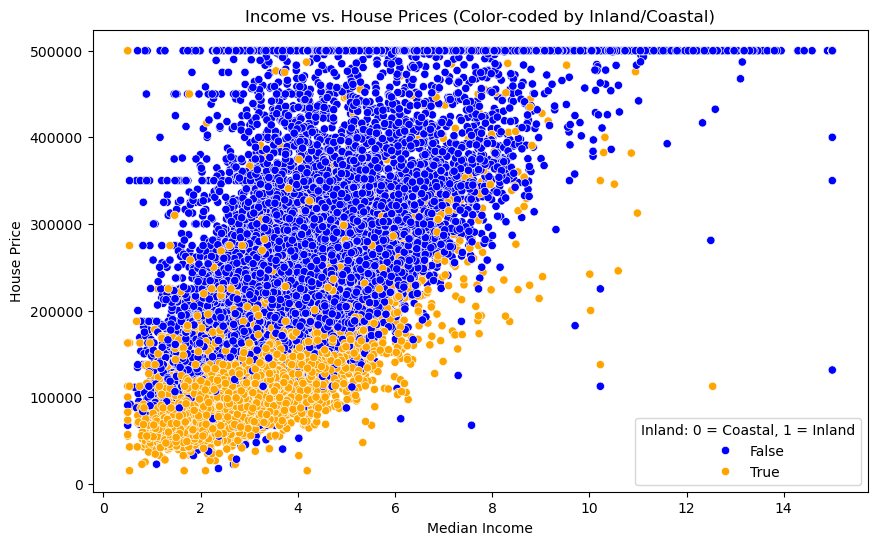

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=housing_data["median_income"], 
    y=housing_data["median_house_value"], 
    hue=housing_data["ocean_proximity_INLAND"], 
    palette={0: "blue", 1: "orange"}
)
plt.title("Income vs. House Prices (Color-coded by Inland/Coastal)")
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.legend(title="Inland: 0 = Coastal, 1 = Inland")
plt.show()


### Key Insights- 

This visualization highlights the relationship between median income and house prices, with inland (orange) and coastal (blue) properties distinguished:

**Coastal Properties (Blue) Are More Expensive**

Most high-income regions correspond to higher house prices, especially for coastal properties.
**Even at lower income levels, coastal properties tend to have higher prices than inland properties.**

**Inland Properties (Orange) Are More Affordable**

Houses in inland areas remain relatively cheap even at higher income levels.
This suggests **inland regions may be more suited for affordable housing projects** or investment opportunities for appreciation.

### Market Strategy Insights

- Luxury Real Estate: Focus on coastal areas where higher-income buyers are willing to pay premium prices.
- Affordable Housing: Inland areas offer opportunities for budget-conscious buyers or rental investments.
- Investment Potential: Inland properties could provide growth potential as incomes rise.

**A real estate company can use this to adjust pricing strategies, target marketing efforts, and identify high-return investment areas based on income levels and proximity to the ocean.**

## Final Summary of the Project

1. What This Project Did

Built predictive models (Linear Regression, Random Forest, XGBoost) to estimate house prices based on key features.
Performed feature importance analysis, identifying income and proximity to the ocean as the most significant factors. Evaluated model accuracy using RMSE, R² scores, and visualized predictions to validate performance.

2. Major Takeaways

**Income and location (inland vs. coastal) significantly impact house prices.**
**Coastal properties command higher prices across all income levels, making them prime targets for luxury real estate.**
**Inland properties remain more affordable, making them better for budget-conscious buyers** or long-term investment.

- XGBoost performed best, achieving RMSE ≈ $47,215 and R² = 0.83, making it the most reliable model.

3. How This Can Be Used Further

- Price Prediction Tool: **A real estate company can integrate this model into a pricing tool for property valuation.**
- Investment Insights: Use feature importance analysis to identify high-growth areas based on income shifts and location demand.
- Urban Planning & Development: Policymakers can leverage this to plan affordable housing projects in inland areas and infrastructure improvements in high-value regions.
